In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import export_graphviz
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Kaggle Titanic Dataset

In this notebook we test the implementation of a simple Decision Tree (QUEST algorithm) on the Titanic Dataset from Kaggle.

We will first run some data analysis and data visualization and then implement the model and analyze its results.

In [3]:
df_train = pd.read_csv('../data/train.csv')
df_train.dropna(inplace=True)

df_test = pd.read_csv('../data/test.csv')
df_test.dropna(inplace=True)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


About 40% of the passengers survived. The mean age was 29 years with the youngest passenger not older than 6 months.

The fare seems to range between rather extreme values. This could be a discriminant factor when trying to predict the survival of a passenger.

### Fare distribution among the population

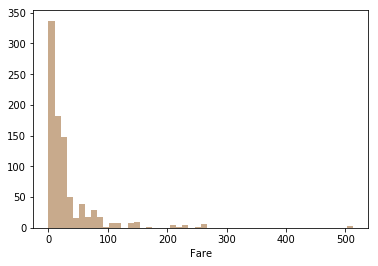

In [9]:
²sns.distplot(df['Fare'], kde=False, rug=False)
plt.show()

### Is Fare linked to a higher survival rate?

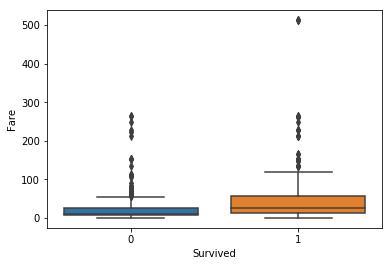

In [15]:
sns.boxplot(x="Survived", y="Fare", data=df)
plt.show()

### Creating discrete variables out of categorical data

If we want to be able to use variables such as 'Embarked' in our classifier we need to modify these in order to turn them into discrete variable. To do that we use the LabelEncoder which is part of the sklearn package.

In [7]:
le = preprocessing.LabelEncoder()
le.fit(df_train['Embarked'].unique())
df_train['Embarked']= le.transform(df_train['Embarked'])
df_test['Embarked']= le.transform(df_test['Embarked'])

### Fitting a simple Decision Tree

In [8]:
features = ['Fare', 'Embarked']
model = DecisionTreeClassifier()
fit_model = model.fit(df_train[features], df_train['Survived'])
y_pred = fit_model.predict(df_train[features])

### Displaying its accuracy

In [9]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(df_train['Survived'], y_pred))

Accuracy: 0.8579234972677595


### Fitting a simple Random Forest

In [11]:
features = ['Fare', 'Embarked']
model_RF = RandomForestClassifier()
fit_model_RF = model_RF.fit(df_train[features], df_train['Survived'])
y_pred_RF = fit_model_RF.predict(df_train[features])

In [12]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(df_train['Survived'], y_pred_RF))

Accuracy: 0.819672131147541
